In [734]:
import numpy as np
import matplotlib.pyplot as plt

In [735]:
def test_points(n_in, n_out):
    a = (np.random.rand(n_in)-.5)*10
    b = np.vstack((a, a*.5+np.random.randn(n_in)*.25))
    points = np.hstack((b, 2*np.random.randn(2, n_out)))
    return np.random.permutation(points.T).T

In [736]:
X = test_points(100,100)
X.shape

(2, 200)

In [737]:
def line_from_points(P, Q):
    rise = Q[1] - P[1]
    run = Q[0] - P[0]
    if run == 0:
        return None
    m = rise/run
    b = P[1] - m*P[0]
    return np.array([1,m,b])

In [738]:
coeff = line_from_points(X[:,0],X[:,1])
coeff

array([ 1.        ,  0.38513414, -0.58693784])

(array([-0.39503476, -0.73907921]), array([-4.44610768, -2.29928569]))

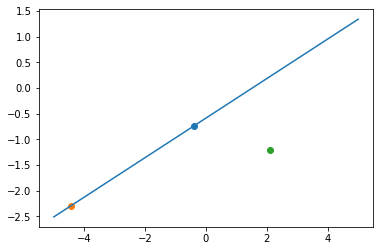

In [739]:
x = np.linspace(-5.0,5.0,1000)
_,A,C = coeff
y = A*x + C
plt.figure(1)
plt.plot(x,y)
plt.scatter(X[:,0][0],X[:,0][1])
plt.scatter(X[:,1][0],X[:,1][1])
plt.scatter(2.1,-1.2)
X[:,0],X[:,1]

In [740]:
def dist_to_line(coefficients,point,check=True):
    l = coefficients.reshape(-1,1)
    l[:2] = l[:2] / np.sqrt((l[:2]**2).sum())
    assert ((l[:2]**2).sum() - 1) < 1e-8
    # d = abs(l.T @ point)
    B,A,C = l
    form = abs(B*point[1] + A*point[0] + C)/np.sqrt(A**2+B**2)
    # if check: 
    #     form = abs(B*point[1] + A*point[0] + C)/np.sqrt(A**2+B**2)
    #     B,A,C = l
    #     # assert d - form < 1e-8, [d,form,point]
    return form

In [741]:
dist_to_line(coeff.copy(),np.array([2.1,-1.2,1]))

array([0.95201624])

In [742]:
def count_inliers(dataset,eps,line):
    inliers = 0
    if dataset.shape[0] == 2:
        dataset = np.append(X,np.ones((1,X.shape[1])),axis=0)
    for i in range(dataset.shape[1]):
        p = dataset[:,i]
        d = dist_to_line(line,p)
        if d < eps:
            inliers += 1
    return inliers

In [743]:
count_inliers(X.copy(),.1,coeff.copy())

6

In [744]:
def random2p(X):
    return X[:,np.random.choice(range(X.shape[1]), 2)].copy()

In [745]:
def ransac(data):
    eps = .5
    max_in = 0
    best_line = None
    # plt.figure(1)
    for _ in range(500):
        sample = random2p(data)
        # plt.scatter(sample[:,0][0],sample[:,0][1],color='r')
        # plt.scatter(sample[:,1][0],sample[:,1][1],color='g')
        coefficients = line_from_points(sample[:,1],sample[:,0])
        if coefficients is None:
            continue
        # _,A,C = coefficients
        # y = A*x + C
        # plt.plot(x,y)
        inliers = count_inliers(data,eps,coefficients.copy())
        if inliers > max_in:
            max_in = inliers
            best_line = coefficients
            print(best_line,inliers,sample)
    return best_line

[ 1.         -0.8122577   2.78969475] 5 [[-1.03178298  2.13299082]
 [ 3.62776842  1.05715654]]
[1.         0.41743446 0.4642188 ] 28 [[1.34153793 2.99403218]
 [1.02422296 1.71403102]]
[1.         0.56894516 0.27575479] 29 [[-2.18596894 -0.01652461]
 [-0.96794166  0.26635319]]
[ 1.          0.18864546 -1.75581942] 38 [[-4.83254578  0.75834568]
 [-2.66745723 -1.61276095]]
[ 1.         -0.00683797  1.99880321] 39 [[0.13644578 3.85859147]
 [1.9978702  1.97241826]]
[ 1.          0.48211236 -0.27412718] 40 [[-3.4138519  -2.97659657]
 [-1.91998737 -1.70918117]]
[ 1.         -0.13096308 -0.55394118] 60 [[-4.91892961  1.62326926]
 [ 0.09025699 -0.76652952]]
[ 1.         -0.49594105 -0.17215789] 116 [[ 2.33880844 -0.25137762]
 [-1.33206901 -0.04748941]]


([<matplotlib.lines.Line2D at 0x21a56d29580>],
 array([ 1.        , -0.49594105, -0.17215789]))

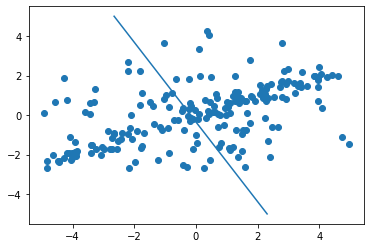

In [746]:
plt.figure(1)
plt.scatter(X[0,:],X[1,:])
lineline = ransac(X)
x = np.linspace(-5.0,5.0,100)
_,A,C = lineline
y = A*x + C
plt.plot(y,x), lineline

In [747]:
def pca_line(x): # assumes x is a (2 x n) array of points
    d = np.cov(x)[:, 0]
    d /= np.linalg.norm(d)
    l = [d[1], -d[0]]
    l.append(-(l@x.mean(1)))
    return l

In [748]:
pca_line(X),lineline

([0.3047519357403679, -0.9524317601080399, 0.03304372863986051],
 array([ 1.        , -0.49594105, -0.17215789]))